In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 

# Ignore warning related to pandas_profiling (https://github.com/pandas-profiling/pandas-profiling/issues/68)
import warnings
warnings.filterwarnings('ignore') 

# Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
# This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 100) 

In [3]:
data=pd.read_csv('survey.csv')

In [4]:
data.shape

(1259, 27)

In [5]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
data.dtypes


Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [7]:
data.sample(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1198,21-02-2015 04:41,32,Male,United States,TX,No,No,Yes,Often,26-100,Yes,Yes,Yes,Not sure,No,Don't know,Don't know,Very difficult,Yes,Maybe,Some of them,No,No,No,Don't know,No,NaN
751,28-08-2014 11:20,42,male,Germany,NaN,No,No,No,NaN,More than 1000,Yes,Yes,Don't know,Not sure,Yes,Yes,Yes,Very easy,No,No,Some of them,No,No,Maybe,Yes,No,NaN
190,27-08-2014 12:53,38,Female,South Africa,NaN,Yes,Yes,Yes,Often,01-May,Yes,Yes,No,Yes,No,No,Yes,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,Maybe,Don't know,Yes,NaN
281,27-08-2014 14:06,27,male,Portugal,NaN,No,No,No,Never,Jun-25,No,Yes,No,No,No,No,Yes,Don't know,Yes,No,No,No,No,Maybe,Don't know,No,It's a small startup in a small city in a smal...
1029,29-08-2014 10:33,34,Male,United States,IN,No,No,No,NaN,More than 1000,No,No,Yes,Not sure,Yes,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,Yes,No,No,Don't know,No,NaN
508,27-08-2014 16:40,47,M,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Don't know,Very easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN
539,27-08-2014 17:56,22,Female,United States,CA,No,Yes,Yes,Sometimes,500-1000,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Some of them,No,No,No,Yes,NaN
643,28-08-2014 03:36,57,Male,United States,CA,No,No,No,Never,26-100,No,Yes,Yes,Yes,No,Yes,Yes,Somewhat difficult,Yes,Maybe,No,No,No,Maybe,Don't know,Yes,NaN
1025,29-08-2014 10:16,42,M,United States,CA,No,Yes,Yes,Sometimes,Jun-25,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
950,29-08-2014 00:47,34,Male,Netherlands,NaN,No,No,Yes,Rarely,26-100,No,Yes,No,Yes,No,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [8]:
# Explore the numeric variable Age to confirm whether all values are within a reasonable range and if any are NaN.
print("Age")
print("Minimum value: ", data["Age"].min())
print("Maximum value: ", data["Age"].max())
print("How many values are NaN?: ", pd.isnull(data['Age']).sum())

Age
Minimum value:  -1726
Maximum value:  99999999999
How many values are NaN?:  0


In [9]:
# Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.

# Count the number of distinct responses and list them:
print("Count of distinct responses for Gender:", len(set(data['Gender'])))
print("Distinct responses for Gender:", set(data['Gender']))

Count of distinct responses for Gender: 49
Distinct responses for Gender: {'woman', 'ostensibly male, unsure what that really means', 'Woman', 'queer/she/they', 'Androgyne', 'cis-female/femme', 'Male-ish', 'Cis Male', 'msle', 'Guy (-ish) ^_^', 'Male ', 'A little about you', 'Genderqueer', 'Neuter', 'Female (trans)', 'Male', 'Man', 'Cis Female', 'f', 'Trans woman', 'Mal', 'p', 'Enby', 'female', 'Cis Man', 'M', 'male leaning androgynous', 'cis male', 'femail', 'something kinda male?', 'non-binary', 'Trans-female', 'All', 'Female (cis)', 'Malr', 'Agender', 'F', 'Male (CIS)', 'maile', 'm', 'Femake', 'Female ', 'Mail', 'male', 'Female', 'Nah', 'fluid', 'queer', 'Make'}


In [10]:
data.columns = map(str.lower, data.columns)

# Confirm that all variable names are now lower case
data.dtypes
   

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [11]:
# Convert "timestamp" data type from object to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Confirm that it worked
data.dtypes

timestamp                    datetime64[ns]
age                                   int64
gender                               object
country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

In [12]:
# Create a new column "age_clean" that replaces out-of-range ages with "NaN"
# The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
def clean_age(age):
    if age>=0 and age<=123:
        return age
    else:
        return np.nan
data['age_clean'] = data['age'].apply(clean_age)

# Check out the new column and make sure it looks right

print("'Age'")
print("Minimum value: ",data["age_clean"].min())
print("Maximum value: ", data["age_clean"].max())
print("How many values are NaN?: ", pd.isnull(data['age_clean']).sum())
print("Frequency table for age_clean:")
data["age_clean"].value_counts().sort_index(0)

'Age'
Minimum value:  5.0
Maximum value:  72.0
How many values are NaN?:  5
Frequency table for age_clean:


5.0      1
8.0      1
11.0     1
18.0     7
19.0     9
20.0     6
21.0    16
22.0    21
23.0    51
24.0    46
25.0    61
26.0    75
27.0    71
28.0    68
29.0    85
30.0    63
31.0    67
32.0    82
33.0    70
34.0    65
35.0    55
36.0    37
37.0    43
38.0    39
39.0    33
40.0    33
41.0    21
42.0    20
43.0    28
44.0    11
45.0    12
46.0    12
47.0     2
48.0     6
49.0     4
50.0     6
51.0     5
53.0     1
54.0     3
55.0     3
56.0     4
57.0     3
58.0     1
60.0     2
61.0     1
62.0     1
65.0     1
72.0     1
Name: age_clean, dtype: int64

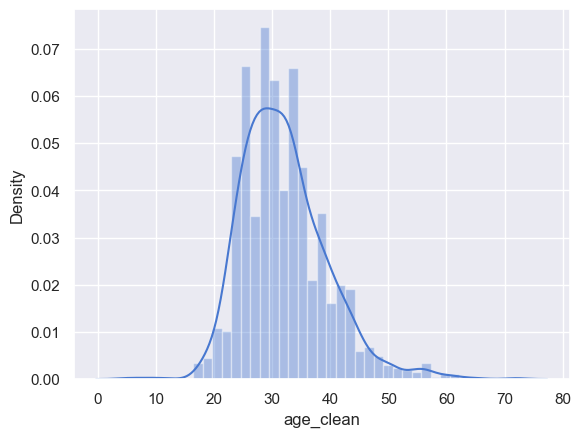

In [13]:
# Plot a histogram of the respondents' ages (remove any NaN values)

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(data["age_clean"].dropna());

In [14]:
# Recategorize each response into these categories: Male (cis), Male (trans), Female (cis), Female (trans), Other

# Standardize the capitalization in the responses by making all characters lower case
data['gender'] = data['gender'].str.lower()

# Make a copy of the column to preserve the original data. I will work with the new column going forward.
data['gender_new'] = data['gender']

# Assign each type of response to one of the five categories

male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr","cis man", "cis male"]
trans_male = [None]
trans_female = ["trans-female",  "trans woman", "female (trans)"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other = ["non-binary", "nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "neuter", "queer", "ostensibly male, unsure what that really means", "queer/she/they", "something kinda male?"]

data['gender_new'] = data['gender_new'].apply(lambda x:"Male (Cis)" if x in male else x)
data['gender_new'] = data['gender_new'].apply(lambda x:"Female (Cis)" if x in female else x)
data['gender_new'] = data['gender_new'].apply(lambda x:"Female (Trans)" if x in trans_female else x)
data['gender_new'] = data['gender_new'].apply(lambda x:"Male (Trans)" if x in trans_male else x)
data['gender_new'] = data['gender_new'].apply(lambda x:"Other" if x in other else x)
data.drop(data[data.gender_new == 'p'].index, inplace=True)
data.drop(data[data.gender_new == 'a little about you'].index, inplace=True)

# Make a crosstab to view the count for each of the new categories
print("Gender:")
print("How many values are NaN?: ", pd.isnull(data['gender_new']).sum())
print("")
print("Frequency table for gender_new:\n", data["gender_new"].value_counts().sort_index(0))
print("")

# Confirm that no entries were missed in the sorting above: display the size of the old and new variables, and of the entire dataset
print("If we didn't miss any entries, these numbers will be the same:")
print("gender =", len(data['gender']), "values")
print("gender_new =", len(data['gender_new']), "values")
print("Dataset Entries =", len(data), "values")

Gender:
How many values are NaN?:  0

Frequency table for gender_new:
 Female (Cis)      247
Female (Trans)      4
Male (Cis)        991
Other              15
Name: gender_new, dtype: int64

If we didn't miss any entries, these numbers will be the same:
gender = 1257 values
gender_new = 1257 values
Dataset Entries = 1257 values


<AxesSubplot:>

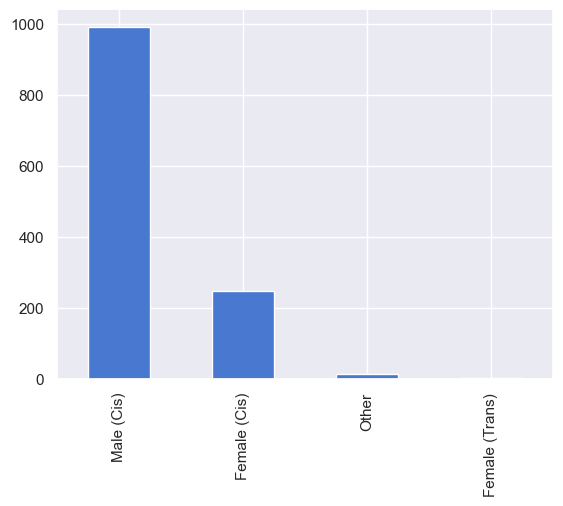

In [15]:
# Create a bar chart comparing gender

data['gender_new'].value_counts().plot(kind='bar')

In [16]:
## Create a new dataframe with the two columns and assign numbers in place of their categories

df = pd.DataFrame({'treatment': data['treatment'], 'work_interfere': data['work_interfere']}, dtype='category')
df_num = df.apply(lambda x: x.cat.codes)

# Run a correlation calculation 
print("Pearson:", df_num.corr())
print("")
print("Spearman:", df_num.corr('spearman'))
print("")
print("Kendall:", df_num.corr('kendall'))

Pearson:                 treatment  work_interfere
treatment        1.000000        0.615657
work_interfere   0.615657        1.000000

Spearman:                 treatment  work_interfere
treatment        1.000000        0.598444
work_interfere   0.598444        1.000000

Kendall:                 treatment  work_interfere
treatment        1.000000        0.541358
work_interfere   0.541358        1.000000


# Observation
Chart: mental health benefits v. seeking treatment
Whether an employee is seeking treatment for a mental health condition appears to be correlated with their knowledge of their employer's mental health benefits.

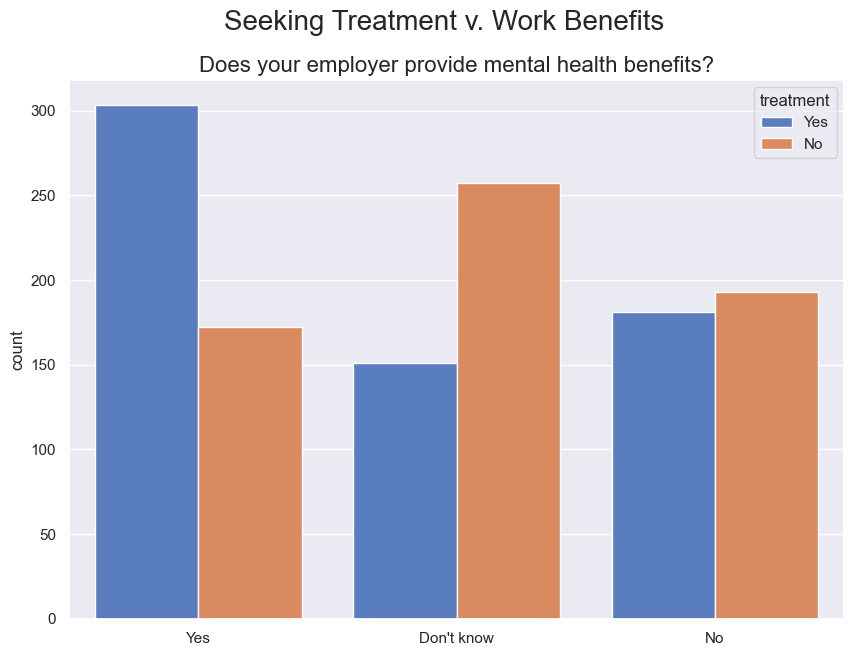

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x="benefits", hue="treatment", hue_order = ["Yes", "No"], data=data)
plt.title("Does your employer provide mental health benefits?",fontsize=16)
plt.suptitle("Seeking Treatment v. Work Benefits", fontsize=20)
plt.xlabel("")
plt.show()

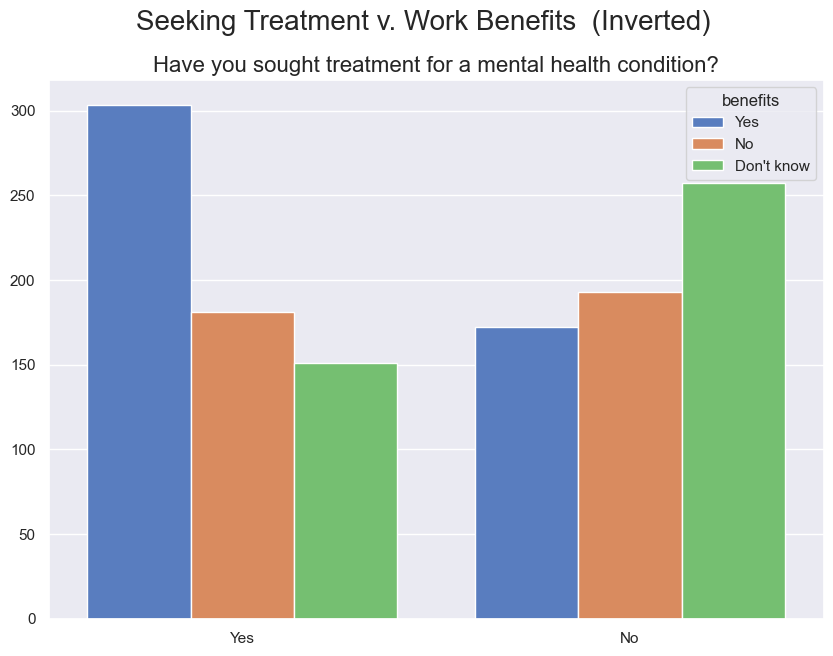

In [18]:
# Generate a chart comparing mental health benefits and treatment
    
plt.figure(figsize=(10,7))
sns.countplot(x="treatment", hue="benefits", hue_order = ["Yes", "No", "Don't know"], data=data)
plt.suptitle("Seeking Treatment v. Work Benefits  (Inverted)", fontsize=20)
plt.title("Have you sought treatment for a mental health condition?",fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

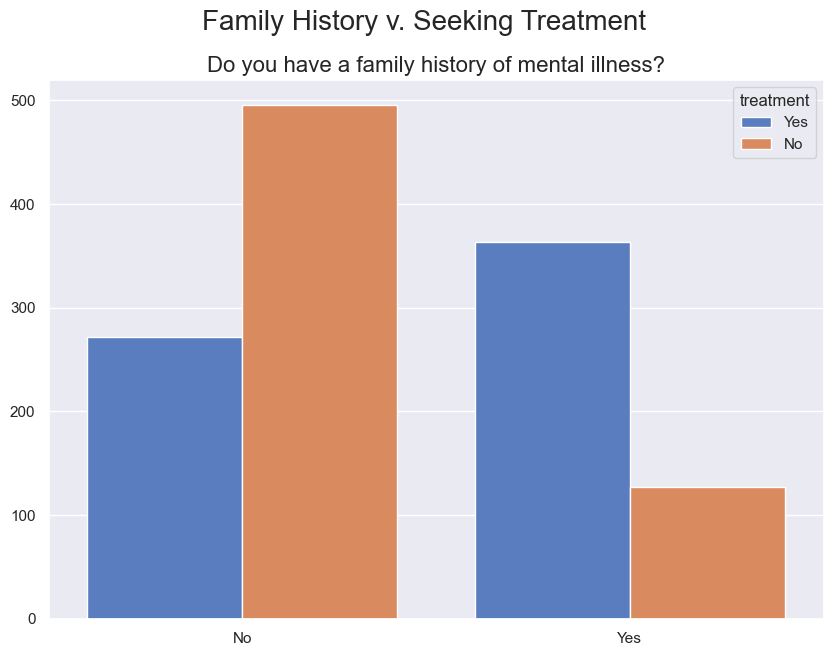

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x="family_history", hue="treatment", hue_order = ["Yes", "No"], data=data)
plt.suptitle("Family History v. Seeking Treatment", fontsize=20)
plt.title("Do you have a family history of mental illness?", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [20]:
#Chi-Squared Test of Independence
#I would like to calculate whether these variables are statistically independent of each other.
# Generate crosstabs of "family history" and "treatment" (the "observed" values)

import scipy.stats as stats

tab_famhist_treatment = pd.crosstab(data["family_history"],data["treatment"], margins = True)
tab_famhist_treatment.columns = ["Treatment Yes","Treatment No","row_totals"]
tab_famhist_treatment.index = ["Fam Hist Yes","Fam Hist No","col_totals"]

observed = tab_famhist_treatment.iloc[0:2,0:2]   # Get table without totals for later use

tab_famhist_treatment

,Treatment Yes,Treatment No,row_totals
Fam Hist Yes,495,272,767
Fam Hist No,127,363,490
col_totals,622,635,1257


In [21]:
# Generate the "expected" values to compare against our "observed" values

expected =  np.outer(tab_famhist_treatment["row_totals"][0:2],
                     tab_famhist_treatment.loc["col_totals"][0:2]) / 1257

expected = pd.DataFrame(expected)

expected.columns = ["Treatment Yes","Treatment No"]
expected.index = ["Fam Hist Yes","Fam Hist No"]

expected

,Treatment Yes,Treatment No
Fam Hist Yes,379.533811,387.466189
Fam Hist No,242.466189,247.533811


In [22]:
# Run the Chi-Squared test

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)


178.38566252465614


In [23]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

# *Note: The degrees of freedom for a test of independence equals the product of 
# the number of categories in each variable minus 1. In this case we have a 2x2 table 
# so df = 1x1 = 1.

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


In [24]:
#Observation:
#A P value of 0.0 does not seem right. 
#I will go back to further investigate whether the chi-squared is appropriate and if I made mistakes in the code above.

In [25]:
# Display the distinct countries represented in the data (quantity and names)

print("Country Count =", len(set(data['country'])))
print("Country Names =", set(data['country']))

Country Count = 47
Country Names = {'Mexico', 'United States', 'Netherlands', 'Philippines', 'Australia', 'Czech Republic', 'Japan', 'Thailand', 'Portugal', 'Singapore', 'Moldova', 'Switzerland', 'Zimbabwe', 'Brazil', 'Israel', 'South Africa', 'Russia', 'Poland', 'Italy', 'Sweden', 'Romania', 'Finland', 'China', 'Spain', 'Germany', 'Costa Rica', 'Denmark', 'Greece', 'Ireland', 'United Kingdom', 'Austria', 'Nigeria', 'France', 'Uruguay', 'Canada', 'Croatia', 'Norway', 'Belgium', 'Bosnia and Herzegovina', 'New Zealand', 'Colombia', 'India', 'Latvia', 'Georgia', 'Slovenia', 'Bulgaria', 'Hungary'}


In [26]:
# Display quantity and names of distinct countries represented in the data (quantity and names)

print("State Count =", len(set(data['state'])))
print("State Names =", set(data['state']))
print(data['state'].describe())

State Count = 46
State Names = {nan, 'PA', 'NM', 'MO', 'MA', 'OK', 'SD', 'IL', 'KY', 'KS', 'NY', 'VA', 'CA', 'CT', 'OH', 'TX', 'MI', 'IA', 'WA', 'NE', 'OR', 'WY', 'FL', 'GA', 'VT', 'MS', 'ME', 'RI', 'WI', 'WV', 'LA', 'NC', 'MD', 'AL', 'NJ', 'IN', 'UT', 'DC', 'NV', 'SC', 'MN', 'CO', 'ID', 'AZ', 'TN', 'NH'}
count     742
unique     45
top        CA
freq      138
Name: state, dtype: object


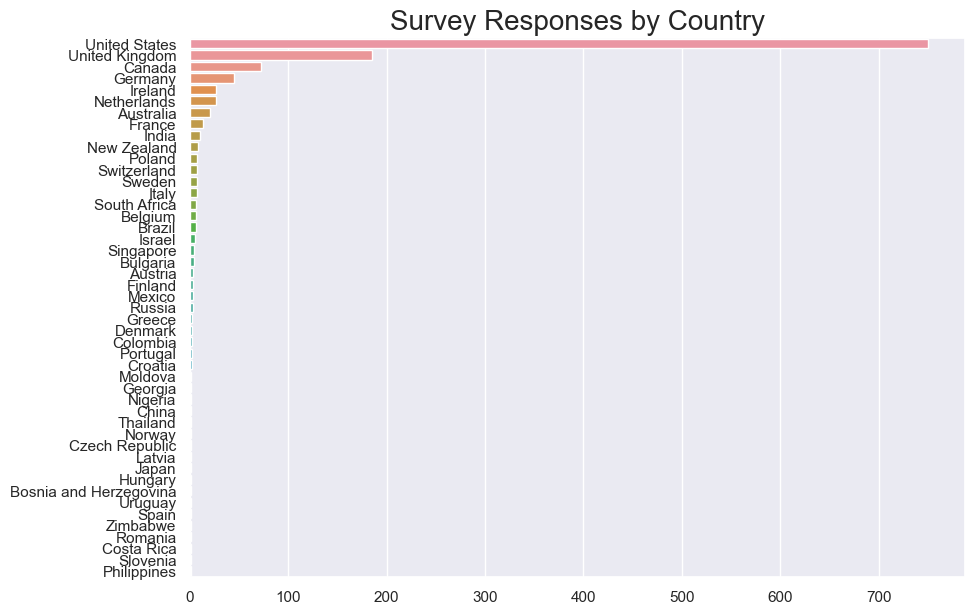

In [27]:
# Create a frequency chart for "country"

plt.figure(figsize=(10, 7))
sns.countplot(y='country', order = data['country'].value_counts().index, data=data)
plt.title('Survey Responses by Country', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

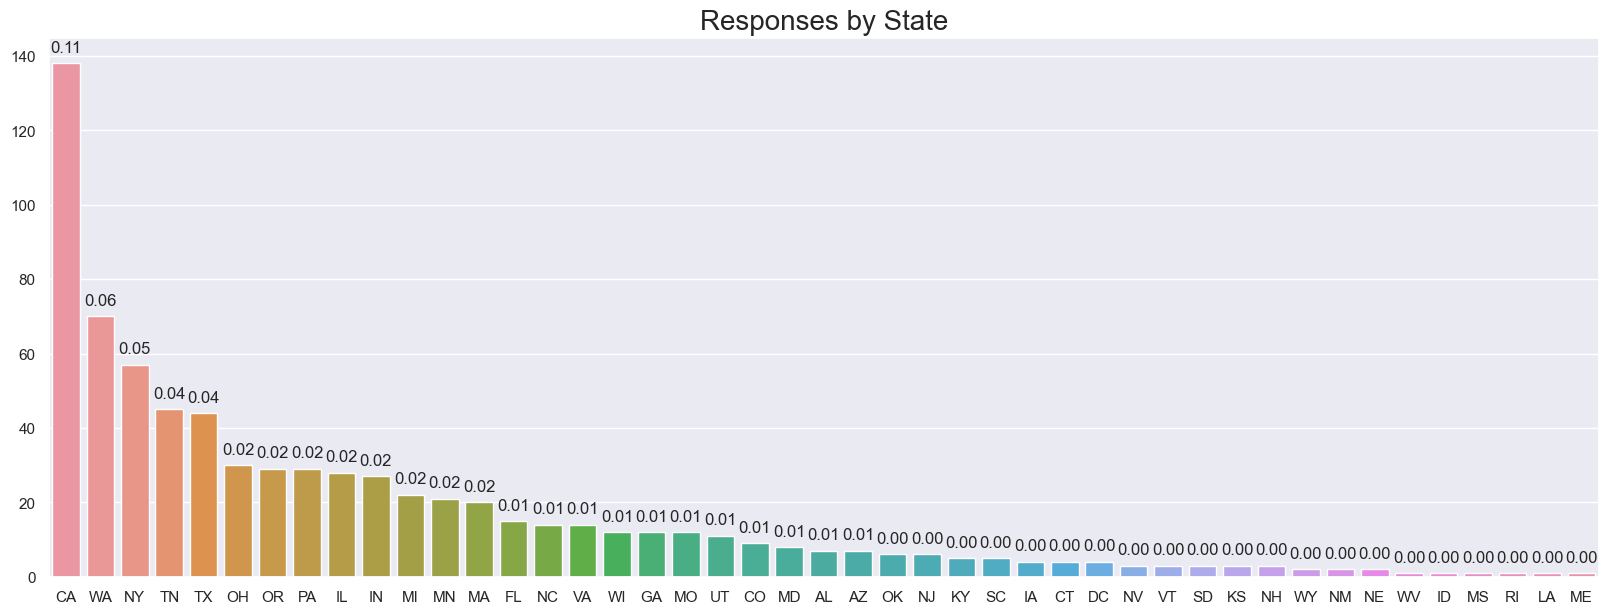

In [28]:
#### Survey Responses by state

total = float(len(data))
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='state', order = data['state'].value_counts().index, data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Responses by State', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

col_0      count
region          
Midwest      164
Northeast    124
South        182
West         272
If we didn't miss anything, this will equal 1257: 1257


<AxesSubplot:xlabel='region'>

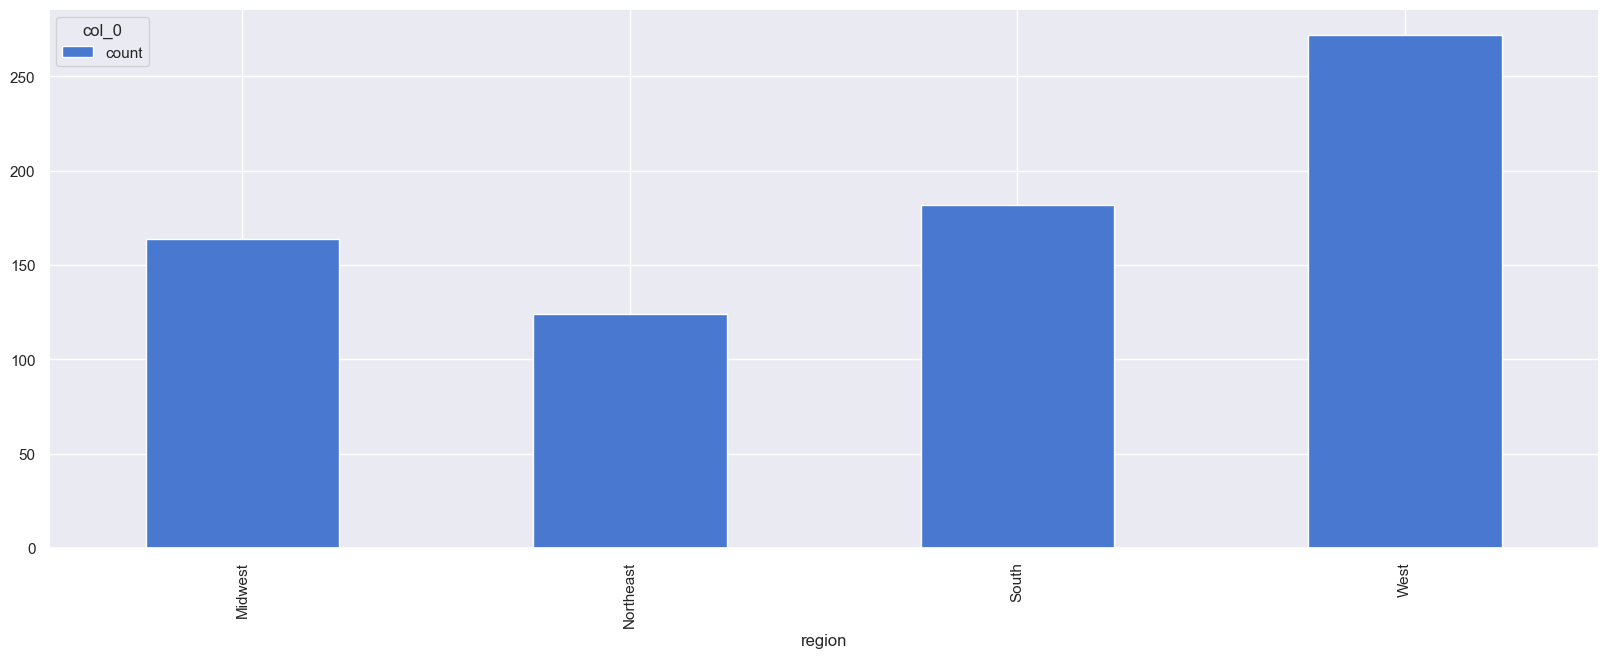

In [29]:
# Define how to recategorize each state into one of the US Census Bureau regions: West, Midwest, South, Northeast

# Mke a copy of the column to preserve the original data. Work with the new column going forward.
data['region'] = data['state']

# Then, in the new column, assign each type of response to one of the new categories

west = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "AZ", "NM", "CO"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "OH", "MI"]
northeast = ["ME",  "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
south = ["MD", "DE", "DC", "WV",  "VA", "NC","SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", "TX"]

data['region'] = data['region'].apply(lambda x:"West" if x in west else x)
data['region'] = data['region'].apply(lambda x:"Midwest" if x in midwest else x)
data['region'] = data['region'].apply(lambda x:"Northeast" if x in northeast else x)
data['region'] = data['region'].apply(lambda x:"South" if x in south else x)

# Make a crosstab to view the count for each of the new categories
region_tab = pd.crosstab(index=data["region"], columns="count")

print(region_tab)

# Confirm that we didn't miss any entries
print("If we didn't miss anything, this will equal 1257:", len(data['region']))

region_tab.plot(kind="bar", 
                 figsize=(20,7),
                 stacked=True)

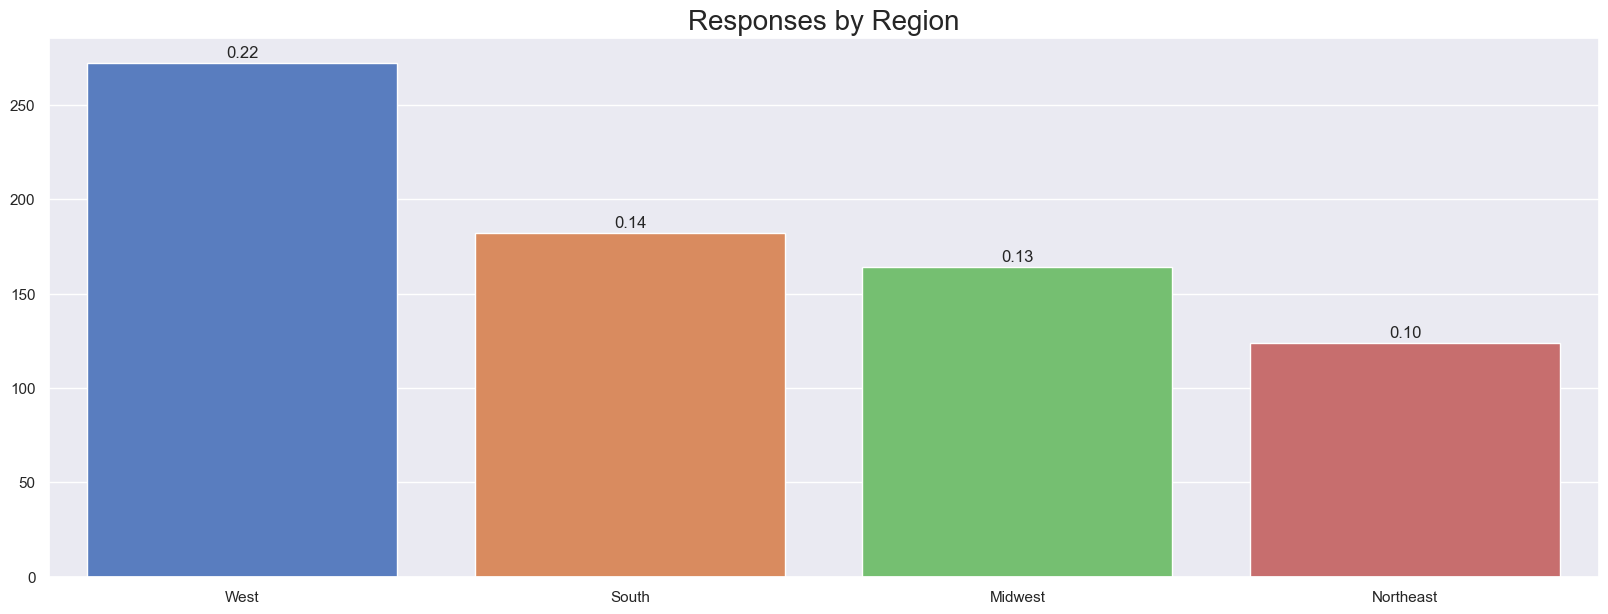

In [30]:
#### Survey Responses by region

total = float(len(data))
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='region', order = data['region'].value_counts().index, data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Responses by Region', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

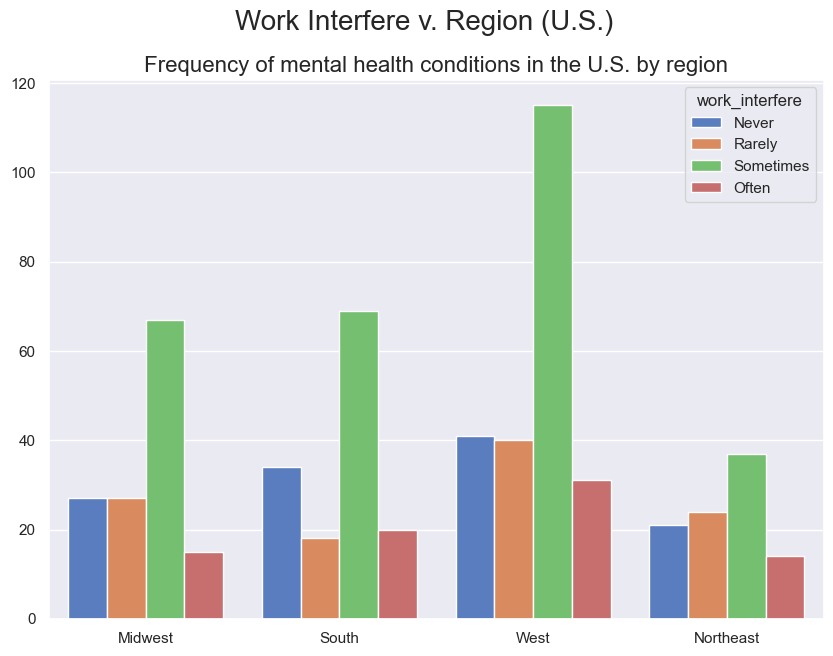

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x="region", hue="work_interfere", hue_order = ["Never", "Rarely", "Sometimes", "Often"], data=data)
plt.suptitle("Work Interfere v. Region (U.S.)", fontsize=20)
plt.title("Frequency of mental health conditions in the U.S. by region", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()